### Simplical Complex Analysis

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

#### Generate a random simplicial complex

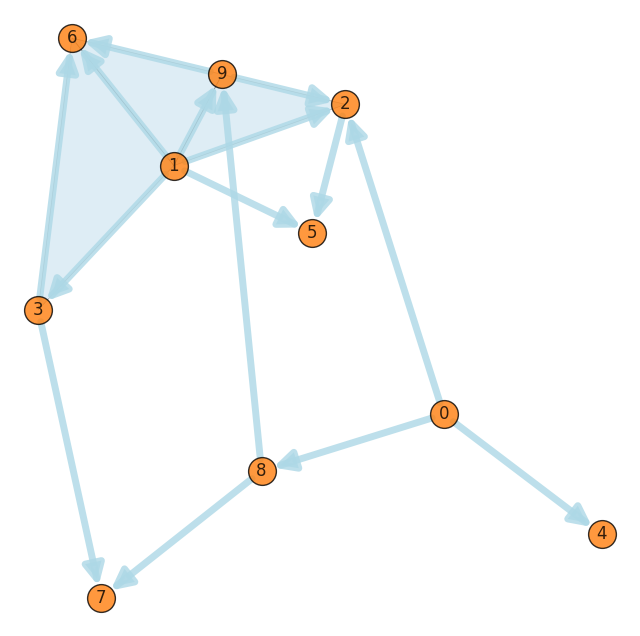

In [53]:
from sclibrary import generate_random_simplicial_complex, SCPlot


sc, coordinates = generate_random_simplicial_complex(
    num_of_nodes=10,
    p=0.25,
    seed=42,
    dist_threshold=0.8
)

scplot = SCPlot(sc, coordinates)
scplot.draw_network()

#### Create a simplicial complex from data

In [2]:
from sclibrary import read_csv, get_coordinates

data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
sc = G.to_simplicial_complex(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")
# create a plot
scplot = SCPlot(sc, coordinates)

In [3]:
# analyze the network
sc.adjacency_matrix(rank=1)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]], dtype=float32)

In [4]:
# incidence matrix - B1
sc.incidence_matrix(rank=1)

array([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]], dtype=float32)

In [5]:
# incidence matrix - B2
sc.incidence_matrix(rank=2)

array([[ 1.,  0.,  0.],
       [-1.,  1.,  0.],
       [ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0., -1.],
       [ 0.,  0.,  1.]], dtype=float32)

In [6]:
sc.get_faces(simplex=(4, 5, 6))

[(4, 6), (4, 5), (5, 6)]

In [7]:
sc.get_cofaces(simplex=(5, 6))

[(4, 5, 6), (5, 6)]